In [1]:
# import Data manipulation library
import numpy as np
import pandas as pd
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#import data filter warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data using url  from github
url = 'https://raw.githubusercontent.com/anirudhakolay/SUPPLYCHAIN/refs/heads/main/SCM.csv'
df = pd.read_csv(url)
df.sample(frac=1)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
15908,WH_115908,EID_65908,Rural,Large,North,Zone 5,3,0,2,5261,...,0,234,35.0,2023.0,0,0,NaN,0,17,7149
15475,WH_115475,EID_65475,Rural,Small,West,Zone 6,8,0,3,4546,...,1,189,35.0,NaN,14,0,A,6,15,18110
14628,WH_114628,EID_64628,Rural,Small,South,Zone 6,0,0,3,4975,...,1,129,50.0,NaN,0,0,NaN,0,2,3123
12097,WH_112097,EID_62097,Rural,Mid,West,Zone 2,7,4,2,4166,...,1,200,28.0,NaN,16,0,C,3,12,20075
11862,WH_111862,EID_61862,Rural,Mid,South,Zone 4,3,2,3,5914,...,1,99,25.0,NaN,19,1,B,6,26,22134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,WH_100938,EID_50938,Rural,Mid,West,Zone 3,0,1,2,4785,...,0,75,32.0,NaN,33,0,C,2,19,43135
1132,WH_101132,EID_51132,Rural,Small,West,Zone 6,8,2,2,5731,...,1,138,39.0,NaN,11,0,C,6,15,14136
14523,WH_114523,EID_64523,Rural,Large,West,Zone 6,7,0,2,4886,...,0,252,28.0,2009.0,20,0,C,5,6,25066
12437,WH_112437,EID_62437,Rural,Large,South,Zone 5,4,0,2,3967,...,1,257,34.0,2020.0,5,0,A,3,25,6110


In [3]:
#CHECKING INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
df['workers_num'].isnull().sum()/len(df['workers_num'])*100
# null value is acceptable upto 5% and >15% it is critical stage

3.959367945823928

In [5]:
df['workers_num'].median()

28.0

In [6]:
df['workers_num'].mean()

28.93639825130447

In [7]:
df['workers_num'].quantile(0.75),df['workers_num'].quantile(0.25)

(33.0, 24.0)

In [8]:
#IMPUTE ONLY INTEGER VALUE WHEN VALUE IS NULL WHICH IS MEAN , MEDIAN OR IQR
df['workers_num'].fillna(28,inplace = True )

In [9]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [10]:
df['wh_est_year'].fillna('2000',inplace=True)

In [11]:
df['wh_est_year'].mode()

0    2000
Name: wh_est_year, dtype: object

In [12]:
df['approved_wh_govt_certificate'].fillna('C',inplace= True)

In [13]:
# seprate categorical and numerical columns 
categorical_columns = df.select_dtypes(include = 'object')

In [14]:
numerical_columns = df.select_dtypes(exclude = 'object')

In [15]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,wh_est_year,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,2000,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,2000,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,2000,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,2000,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,2009.0,C
...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,2007.0,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,2000,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,2000,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,2000,B


In [16]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID'],inplace= True)

In [17]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2000,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,2000,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2000,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,2000,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [18]:
#evaluate the data for west zone 
df[df['zone']=='West']

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2000,13,0,A,5,15,17115
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,...,1,77,27.0,2010.0,24,0,B,3,6,30142
14,Rural,Small,West,Zone 6,8,1,4,5022,Rented,68,...,1,129,37.0,2000,6,0,B,3,9,7055
16,Rural,Mid,West,Zone 4,0,0,2,5569,Company Owned,16,...,1,231,28.0,2000,9,0,B+,5,11,12127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22119,Rural,Large,West,Zone 6,8,0,4,4687,Rented,62,...,1,160,26.0,2005.0,32,0,B,3,23,40086
22138,Rural,Mid,West,Zone 4,7,0,3,4686,Company Owned,55,...,1,148,28.0,2010.0,23,0,B+,6,11,29130
22139,Rural,Mid,West,Zone 3,5,0,4,3771,Rented,66,...,0,97,30.0,1998.0,24,0,C,2,19,30102
22140,Rural,Large,West,Zone 5,7,0,4,4593,Rented,18,...,1,78,24.0,2008.0,18,0,B+,6,14,21128


<AxesSubplot:ylabel='zone'>

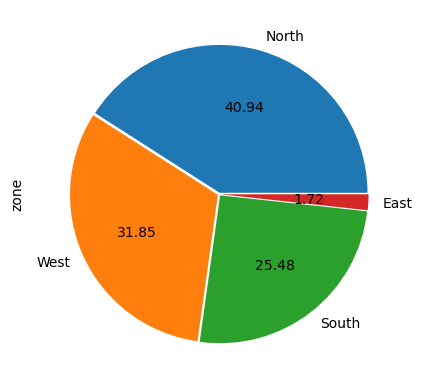

In [19]:
df['zone'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.01,0.01,0.01,0.01])

In [20]:
southzone = df[df['zone']=='South']

In [21]:
southzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2000,17,0,A,6,22,23137
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,...,0,78,43.0,2000,6,0,C,6,2,7130
13,Rural,Mid,South,Zone 4,6,1,2,6858,Company Owned,26,...,1,242,36.0,2008.0,22,1,A,5,11,30063
19,Rural,Small,South,Zone 1,1,1,2,5679,Rented,19,...,1,189,24.0,2000,22,0,B,2,21,27100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22133,Rural,Large,South,Zone 5,7,0,2,5114,Company Owned,30,...,0,85,33.0,2000,14,0,B,5,10,16063
22135,Urban,Large,South,Zone 5,8,0,4,4312,Rented,19,...,0,194,21.0,2014.0,19,1,A,2,25,26114
22136,Urban,Small,South,Zone 1,3,1,2,5792,Rented,43,...,0,217,21.0,2012.0,19,0,B,2,31,22082
22144,Rural,Small,South,Zone 6,1,2,3,3325,Company Owned,22,...,1,160,37.0,2000,9,0,B,5,9,10068


In [22]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,wh_est_year,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,2000,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,2000,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,2000,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,2000,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,2009.0,C
...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,2007.0,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,2000,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,2000,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,2000,B


In [23]:
df['Location_type'].value_counts()

Rural    20334
Urban     1816
Name: Location_type, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location_type']= le.fit_transform(df['Location_type'])

In [25]:
df['Location_type'].value_counts()

0    20334
1     1816
Name: Location_type, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder#-------CONVERT CATEGORICAL TO NUMERICAL
le = LabelEncoder()
df['WH_capacity_size']= le.fit_transform(df['WH_capacity_size'])

In [27]:
df['WH_capacity_size'].value_counts()

0    8968
1    8902
2    4280
Name: WH_capacity_size, dtype: int64

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 22150 non-null  int32  
 1   WH_capacity_size              22150 non-null  int32  
 2   zone                          22150 non-null  object 
 3   WH_regional_zone              22150 non-null  object 
 4   num_refill_req_l3m            22150 non-null  int64  
 5   transport_issue_l1y           22150 non-null  int64  
 6   Competitor_in_mkt             22150 non-null  int64  
 7   retail_shop_num               22150 non-null  int64  
 8   wh_owner_type                 22150 non-null  object 
 9   distributor_num               22150 non-null  int64  
 10  flood_impacted                22150 non-null  int64  
 11  flood_proof                   22150 non-null  int64  
 12  electric_supply               22150 non-null  int64  
 13  d

In [29]:
southzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2000,17,0,A,6,22,23137
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,...,0,78,43.0,2000,6,0,C,6,2,7130
13,Rural,Mid,South,Zone 4,6,1,2,6858,Company Owned,26,...,1,242,36.0,2008.0,22,1,A,5,11,30063
19,Rural,Small,South,Zone 1,1,1,2,5679,Rented,19,...,1,189,24.0,2000,22,0,B,2,21,27100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22133,Rural,Large,South,Zone 5,7,0,2,5114,Company Owned,30,...,0,85,33.0,2000,14,0,B,5,10,16063
22135,Urban,Large,South,Zone 5,8,0,4,4312,Rented,19,...,0,194,21.0,2014.0,19,1,A,2,25,26114
22136,Urban,Small,South,Zone 1,3,1,2,5792,Rented,43,...,0,217,21.0,2012.0,19,0,B,2,31,22082
22144,Rural,Small,South,Zone 6,1,2,3,3325,Company Owned,22,...,1,160,37.0,2000,9,0,B,5,9,10068


In [30]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2000,13,0,A,5,15,17115
1,0,0,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,2000,4,0,A,3,17,5074
2,0,1,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2000,17,0,A,6,22,23137
3,0,1,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,2000,17,1,A+,3,27,22115
4,0,0,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,North,Zone 6,8,1,3,5030,Rented,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,0,2,South,Zone 6,3,1,3,4320,Rented,60,...,0,170,28.0,2000,26,0,C,5,9,33108
22147,0,0,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,99,22.0,2000,20,0,B+,6,4,24072
22148,0,0,North,Zone 6,6,2,4,4378,Rented,32,...,0,220,17.0,2000,13,0,B,3,28,15055


In [31]:
'''
WHENEVER YOU ARE ENCODING ANY COLUMN FROM DATASET MAKE SURE THAT YOU SHOULD NOT USE LABELENCODER,ONE-HOTENCODER,ORDINALENCODER FOR TARGET COLUMN
INDEPENDENT COLUMN IS DENOTED BY CAPITAL X BEACAUSE IN WHICH MULTIPLE COLUMNS INCLUDE 
BUT IN TARGET COLUMN DENOTED BY SMALL y BEACAUSE ONE COLUMN IS INCLUDE
'''

'\nWHENEVER YOU ARE ENCODING ANY COLUMN FROM DATASET MAKE SURE THAT YOU SHOULD NOT USE LABELENCODER,ONE-HOTENCODER,ORDINALENCODER FOR TARGET COLUMN\nINDEPENDENT COLUMN IS DENOTED BY CAPITAL X BEACAUSE IN WHICH MULTIPLE COLUMNS INCLUDE \nBUT IN TARGET COLUMN DENOTED BY SMALL y BEACAUSE ONE COLUMN IS INCLUDE\n'

In [32]:
df['zone'].value_counts()

North    9069
West     7055
South    5644
East      382
Name: zone, dtype: int64

In [33]:
df['zone']=le.fit_transform(df['zone'])

In [34]:
df['zone'].value_counts()

1    9069
3    7055
2    5644
0     382
Name: zone, dtype: int64

In [35]:
df['WH_regional_zone'].value_counts()

Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: WH_regional_zone, dtype: int64

In [36]:
df['WH_regional_zone']=le.fit_transform(df['WH_regional_zone'])

In [37]:
df['WH_regional_zone'].value_counts()

5    7376
4    4045
3    3708
1    2642
2    2552
0    1827
Name: WH_regional_zone, dtype: int64

In [38]:
df['wh_owner_type'].value_counts()

Company Owned    12035
Rented           10115
Name: wh_owner_type, dtype: int64

In [39]:
df['wh_owner_type']=le.fit_transform(df['wh_owner_type'])

In [40]:
df['wh_owner_type'].value_counts()

0    12035
1    10115
Name: wh_owner_type, dtype: int64

In [41]:
df['approved_wh_govt_certificate'].value_counts()

C     5664
B+    4321
B     4269
A     4158
A+    3738
Name: approved_wh_govt_certificate, dtype: int64

In [42]:
df['approved_wh_govt_certificate']=le.fit_transform(df['approved_wh_govt_certificate'])

In [43]:
df['approved_wh_govt_certificate'].value_counts()

4    5664
3    4321
2    4269
0    4158
1    3738
Name: approved_wh_govt_certificate, dtype: int64

In [44]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2000,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2000,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2000,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2000,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,1,2,4,29138
22146,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,2000,26,0,4,5,9,33108
22147,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,2000,20,0,3,6,4,24072
22148,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,2000,13,0,2,3,28,15055


In [45]:
'''
data is normaly distrubuted then standerd scaler
data is non normal distrubuted then min max scaler
data is non normal distrubuted and also outliers is more than 5% then use robust scaler
'''

'\ndata is normaly distrubuted then standerd scaler\ndata is non normal distrubuted then min max scaler\ndata is non normal distrubuted and also outliers is more than 5% then use robust scaler\n'